In [1]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image


# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 9.0)

In [2]:
caso3_experimental_v = [-0.436, 0.163, 0.368, 0.005, -0.492 ]
caso3_experimental_h = [0.046, 0.127, -0.012, -0.128, -0.025 ]
caso1_experimental_v = [-0.138, 0.031, 0.147, -0.017, -0.142 ]
caso1_experimental_h = [-0.013, -0.033, 0.005, 0.03, 0.021 ]

caso2_experimental_lv = [-0.257, 0.127, 0.358, 0.118, -0.257 ]
caso2_experimental_lh = [-0.008, 0.015, 0.008, 0.005, 0.037 ]


caso1_experimental_lv = [-0.114, 0.053, 0.181, 0.040, -0.126 ]
caso1_experimental_lh = [-0.014, -0.035, 0.003, 0.033, 0.021 ]
x = [ 0.091,0.046 , 0.000, -0.046, -0.091 ] 

In [3]:
# loading the digitized data
vertical_data = open("netl-case3-distributor-vertical_velocity.csv", 'r')
time_v, v_bin1, v_bin2, v_bin3, v_bin4, v_bin5 = np.loadtxt(vertical_data, delimiter = ',', skiprows = 1, unpack = True)    
vertical_data.close()

horizontal_data = open("netl-case3-distributor-horizontal_velocity.csv", 'r')
time_h, h_bin1, h_bin2, h_bin3, h_bin4, h_bin5 = np.loadtxt(horizontal_data, delimiter = ',', skiprows = 1, unpack = True)    
horizontal_data.close()

vertical_data = open("netl-case1-no_distributor-vertical_velocity_alpha11.csv", 'r')
time_v_alpha11, v_bin1_alpha11, v_bin2_alpha11, v_bin3_alpha11, v_bin4_alpha11, v_bin5_alpha11 = np.loadtxt(vertical_data, delimiter = ';', skiprows = 1, unpack = True)    
vertical_data.close()

horizontal_data = open("netl-case3-no-distributor-horizontal_velocity.csv", 'r')
case3_no_time_h, case3_no_h_bin1, case3_no_h_bin2, case3_no_h_bin3, case3_no_h_bin4, case3_no_h_bin5 = np.loadtxt(horizontal_data, delimiter = ',', skiprows = 1, unpack = True)    
horizontal_data.close()

vertical_data = open("netl-case3-no-distributor-vertical_velocity.csv", 'r')
case3_no_time_v, case3_no_v_bin1, case3_no_v_bin2, case3_no_v_bin3, case3_no_v_bin4, case3_no_v_bin5 = np.loadtxt(vertical_data, delimiter = ',', skiprows = 1, unpack = True)    
vertical_data.close()

vertical_data = open("netl-case2-no-distributor-vertical_velocity.csv", 'r')
case2_no_time_v, case2_no_v_bin1, case2_no_v_bin2, case2_no_v_bin3, case2_no_v_bin4, case2_no_v_bin5 = np.loadtxt(vertical_data, delimiter = ',', skiprows = 1, unpack = True)    
vertical_data.close()

horizontal_data = open("netl-case2-no-distributor-horizontal_velocity.csv", 'r')
case2_no_time_h, case2_no_h_bin1, case2_no_h_bin2, case2_no_h_bin3, case2_no_h_bin4, case2_no_h_bin5 = np.loadtxt(horizontal_data, delimiter = ',', skiprows = 1, unpack = True)    
horizontal_data.close()

vertical_data = open("netl-case1-no_distributor-vertical_velocity.csv", 'r')
case1_no_time_v, case1_no_v_bin1, case1_no_v_bin2, case1_no_v_bin3, case1_no_v_bin4, case1_no_v_bin5 = np.loadtxt(vertical_data, delimiter = ',', skiprows = 1, unpack = True)    
vertical_data.close()

horizontal_data = open("netl-case1-no_distributor-horizontal_velocity.csv", 'r')
case1_no_time_h, case1_no_h_bin1, case1_no_h_bin2, case1_no_h_bin3, case1_no_h_bin4, case1_no_h_bin5 = np.loadtxt(horizontal_data, delimiter = ',', skiprows = 1, unpack = True)    
horizontal_data.close()

horizontal_data = open("netl-case1-no_distributor-horizontal_velocity_alpha11.csv", 'r')
time_h_alpha11, h_bin1_alpha11, h_bin2_alpha11, h_bin3_alpha11, h_bin4_alpha11, h_bin5_alpha11 = np.loadtxt(horizontal_data, delimiter = ';', skiprows = 1, unpack = True)    
horizontal_data.close()

vertical_data = open("netl-case1-no_distributor-vertical_velocity_alpha11.csv", 'r')
time_v_alpha11, v_bin1_alpha11, v_bin2_alpha11, v_bin3_alpha11, v_bin4_alpha11, v_bin5_alpha11 = np.loadtxt(vertical_data, delimiter = ';', skiprows = 1, unpack = True)    
vertical_data.close()

horizontal_data = open("netl-case2-no_distributor-horizontal_velocity_alpha11.csv", 'r')
time_h_case2_alpha11, h_case2_bin1_alpha11, h_case2_bin2_alpha11, h_case2_bin3_alpha11, h_case2_bin4_alpha11, h_case2_bin5_alpha11 = np.loadtxt(horizontal_data, delimiter = ';', skiprows = 1, unpack = True)    
horizontal_data.close()

vertical_data = open("netl-case2-no_distributor-vertical_velocity_alpha11.csv", 'r')
time_v_case2_alpha11, v_case2_bin1_alpha11, v_case2_bin2_alpha11, v_case2_bin3_alpha11, v_case2_bin4_alpha11, v_case2_bin5_alpha11 = np.loadtxt(vertical_data, delimiter = ';', skiprows = 1, unpack = True)    
vertical_data.close()

horizontal_data = open("netl-case3-no_distributor-horizontal_velocity_alpha11.csv", 'r')
time_h_case3_alpha11, h_case3_bin1_alpha11, h_case3_bin2_alpha11, h_case3_bin3_alpha11, h_case3_bin4_alpha11, h_case3_bin5_alpha11 = np.loadtxt(horizontal_data, delimiter = ';', skiprows = 1, unpack = True)    
horizontal_data.close()

vertical_data = open("netl-case3-no_distributor-vertical_velocity_alpha11.csv", 'r')
time_v_case3_alpha11, v_case3_bin1_alpha11, v_case3_bin2_alpha11, v_case3_bin3_alpha11, v_case3_bin4_alpha11, v_case3_bin5_alpha11 = np.loadtxt(vertical_data, delimiter = ';', skiprows = 1, unpack = True)    
vertical_data.close()

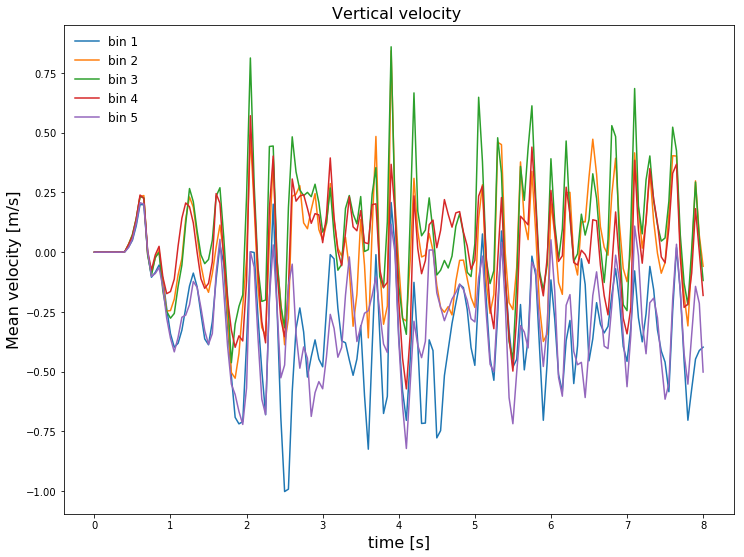

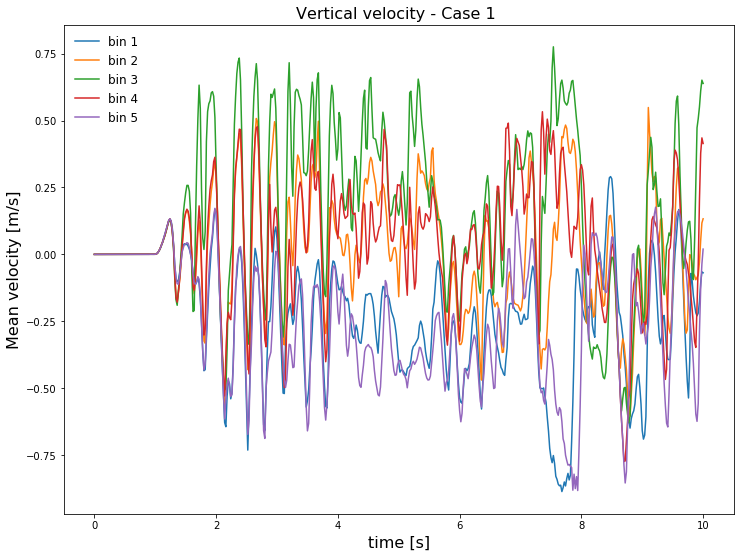

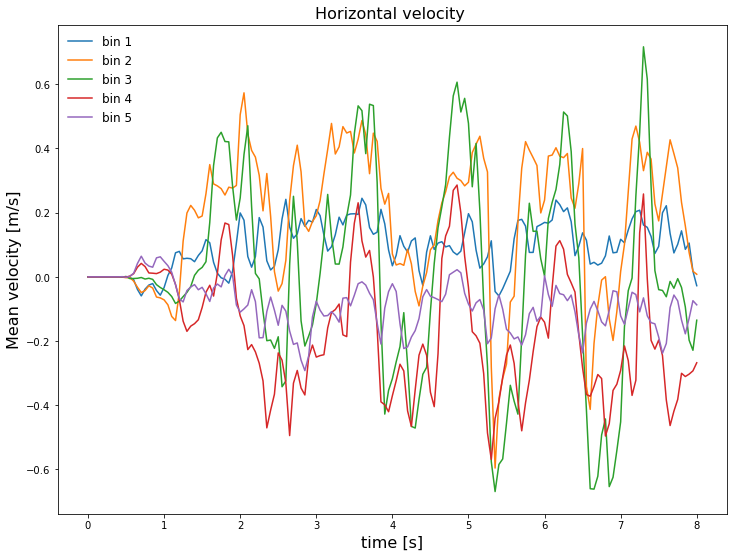

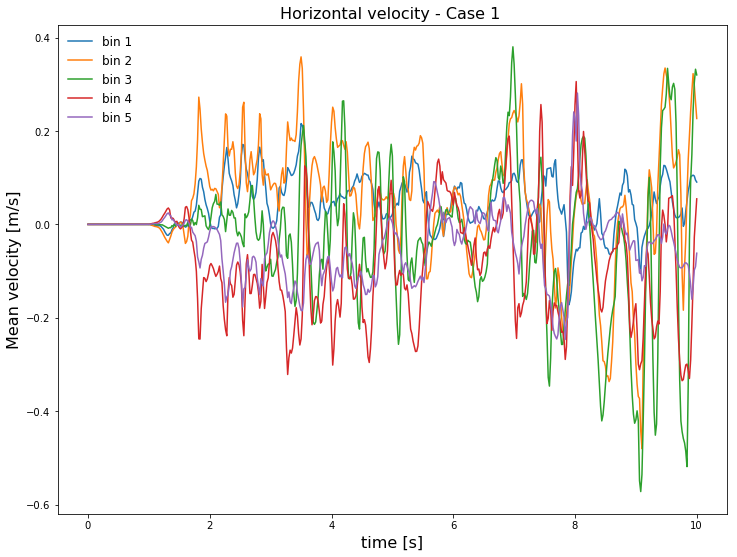

In [4]:

plt.plot(time_v,  v_bin1, linestyle = "-", marker = 'None', label = "bin 1")
plt.plot(time_v,  v_bin2, linestyle = "-", marker = 'None', label = "bin 2")
plt.plot(time_v,  v_bin3, linestyle = "-", marker = 'None', label = "bin 3")
plt.plot(time_v,  v_bin4, linestyle = "-", marker = 'None', label = "bin 4")
plt.plot(time_v,  v_bin5, linestyle = "-", marker = 'None', label = "bin 5")
plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("time [s]", fontsize = 16)
plt.ylabel("Mean velocity [m/s]", fontsize = 16)
plt.legend(fontsize = 12, frameon = False)
plt.show()

plt.plot(time_v_alpha11,  v_bin1_alpha11, linestyle = "-", marker = 'None', label = "bin 1")
plt.plot(time_v_alpha11,  v_bin2_alpha11, linestyle = "-", marker = 'None', label = "bin 2")
plt.plot(time_v_alpha11,  v_bin3_alpha11, linestyle = "-", marker = 'None', label = "bin 3")
plt.plot(time_v_alpha11,  v_bin4_alpha11, linestyle = "-", marker = 'None', label = "bin 4")
plt.plot(time_v_alpha11,  v_bin5_alpha11, linestyle = "-", marker = 'None', label = "bin 5")
plt.title("Vertical velocity - Case 1 ", fontsize = 16)
plt.xlabel("time [s]", fontsize = 16)
plt.ylabel("Mean velocity [m/s]", fontsize = 16)
plt.legend(fontsize = 12, frameon = False)
plt.show()


plt.plot(time_h,  h_bin1, linestyle = "-", marker = 'None', label = "bin 1")
plt.plot(time_h,  h_bin2, linestyle = "-", marker = 'None', label = "bin 2")
plt.plot(time_h,  h_bin3, linestyle = "-", marker = 'None', label = "bin 3")
plt.plot(time_h,  h_bin4, linestyle = "-", marker = 'None', label = "bin 4")
plt.plot(time_h,  h_bin5, linestyle = "-", marker = 'None', label = "bin 5")
plt.title("Horizontal velocity ", fontsize = 16)
plt.xlabel("time [s]", fontsize = 16)
plt.ylabel("Mean velocity [m/s]", fontsize = 16)
plt.legend(fontsize = 12, frameon = False)
plt.show()

plt.plot(time_h_alpha11,  h_bin1_alpha11, linestyle = "-", marker = 'None', label = "bin 1")
plt.plot(time_h_alpha11,  h_bin2_alpha11, linestyle = "-", marker = 'None', label = "bin 2")
plt.plot(time_h_alpha11,  h_bin3_alpha11, linestyle = "-", marker = 'None', label = "bin 3")
plt.plot(time_h_alpha11,  h_bin4_alpha11, linestyle = "-", marker = 'None', label = "bin 4")
plt.plot(time_h_alpha11,  h_bin5_alpha11, linestyle = "-", marker = 'None', label = "bin 5")
plt.title("Horizontal velocity - Case 1 ", fontsize = 16)
plt.xlabel("time [s]", fontsize = 16)
plt.ylabel("Mean velocity [m/s]", fontsize = 16)
plt.legend(fontsize = 12, frameon = False)
plt.show()

In [5]:


caso1_no_limited_time = case1_no_time_v[np.argmax(case1_no_time_v>2.0):]
caso1_no_limited_time_alpha = time_v_alpha11[np.argmax(time_v_alpha11>2.0):]

caso1_no_limited_v1 = case1_no_v_bin1[np.argmax(case1_no_time_v>2.0):]
caso1_no_limited_v2 = case1_no_v_bin2[np.argmax(case1_no_time_v>2.0):]
caso1_no_limited_v3 = case1_no_v_bin3[np.argmax(case1_no_time_v>2.0):]
caso1_no_limited_v4 = case1_no_v_bin4[np.argmax(case1_no_time_v>2.0):]
caso1_no_limited_v5 = case1_no_v_bin5[np.argmax(case1_no_time_v>2.0):]

caso1_no_limited_v1_alpha11 = v_bin1_alpha11[np.argmax(time_v_alpha11>2.0):]
caso1_no_limited_v2_alpha11 = v_bin2_alpha11[np.argmax(time_v_alpha11>2.0):]
caso1_no_limited_v3_alpha11 = v_bin3_alpha11[np.argmax(time_v_alpha11>2.0):]
caso1_no_limited_v4_alpha11 = v_bin4_alpha11[np.argmax(time_v_alpha11>2.0):]
caso1_no_limited_v5_alpha11 = v_bin5_alpha11[np.argmax(time_v_alpha11>2.0):]

caso1_no_limited_h1 = case1_no_h_bin1[np.argmax(case1_no_time_h>2.0):]
caso1_no_limited_h2 = case1_no_h_bin2[np.argmax(case1_no_time_h>2.0):]
caso1_no_limited_h3 = case1_no_h_bin3[np.argmax(case1_no_time_h>2.0):]
caso1_no_limited_h4 = case1_no_h_bin4[np.argmax(case1_no_time_h>2.0):]
caso1_no_limited_h5 = case1_no_h_bin5[np.argmax(case1_no_time_h>2.0):]

caso1_no_limited_h1_alpha11 = h_bin1_alpha11[np.argmax(time_h_alpha11>2.0):]
caso1_no_limited_h2_alpha11 = h_bin2_alpha11[np.argmax(time_h_alpha11>2.0):]
caso1_no_limited_h3_alpha11 = h_bin3_alpha11[np.argmax(time_h_alpha11>2.0):]
caso1_no_limited_h4_alpha11 = h_bin4_alpha11[np.argmax(time_h_alpha11>2.0):]
caso1_no_limited_h5_alpha11 = h_bin5_alpha11[np.argmax(time_h_alpha11>2.0):]

caso2_no_limited_time = case2_no_time_v[np.argmax(case2_no_time_v>2.0):]
caso2_no_limited_time_alpha11 = time_v_case2_alpha11[np.argmax(time_v_case2_alpha11>2.0):]

caso2_no_limited_v1 = case2_no_v_bin1[np.argmax(case2_no_time_v>2.0):]
caso2_no_limited_v2 = case2_no_v_bin2[np.argmax(case2_no_time_v>2.0):]
caso2_no_limited_v3 = case2_no_v_bin3[np.argmax(case2_no_time_v>2.0):]
caso2_no_limited_v4 = case2_no_v_bin4[np.argmax(case2_no_time_v>2.0):]
caso2_no_limited_v5 = case2_no_v_bin5[np.argmax(case2_no_time_v>2.0):]

caso2_no_limited_v1_alpha11 = v_case2_bin1_alpha11[np.argmax(time_v_case2_alpha11>2.0):]
caso2_no_limited_v2_alpha11 = v_case2_bin2_alpha11[np.argmax(time_v_case2_alpha11>2.0):]
caso2_no_limited_v3_alpha11 = v_case2_bin3_alpha11[np.argmax(time_v_case2_alpha11>2.0):]
caso2_no_limited_v4_alpha11 = v_case2_bin4_alpha11[np.argmax(time_v_case2_alpha11>2.0):]
caso2_no_limited_v5_alpha11 = v_case2_bin5_alpha11[np.argmax(time_v_case2_alpha11>2.0):]

caso2_no_limited_h1 = case2_no_h_bin1[np.argmax(case2_no_time_h>2.0):]
caso2_no_limited_h2 = case2_no_h_bin2[np.argmax(case2_no_time_h>2.0):]
caso2_no_limited_h3 = case2_no_h_bin3[np.argmax(case2_no_time_h>2.0):]
caso2_no_limited_h4 = case2_no_h_bin4[np.argmax(case2_no_time_h>2.0):]
caso2_no_limited_h5 = case2_no_h_bin5[np.argmax(case2_no_time_h>2.0):]

caso2_no_limited_h1_alpha11 = h_case2_bin1_alpha11[np.argmax(time_h_case2_alpha11>2.0):]
caso2_no_limited_h2_alpha11 = h_case2_bin2_alpha11[np.argmax(time_h_case2_alpha11>2.0):]
caso2_no_limited_h3_alpha11 = h_case2_bin3_alpha11[np.argmax(time_h_case2_alpha11>2.0):]
caso2_no_limited_h4_alpha11 = h_case2_bin4_alpha11[np.argmax(time_h_case2_alpha11>2.0):]
caso2_no_limited_h5_alpha11 = h_case2_bin5_alpha11[np.argmax(time_h_case2_alpha11>2.0):]

#caso3_no_limited_time = case3_no_time_v[np.argmax(case3_no_time_v>2.0):]

caso3_no_limited_v1 = case3_no_v_bin1[np.argmax(case3_no_time_v>2.0):]
caso3_no_limited_v2 = case3_no_v_bin2[np.argmax(case3_no_time_v>2.0):]
caso3_no_limited_v3 = case3_no_v_bin3[np.argmax(case3_no_time_v>2.0):]
caso3_no_limited_v4 = case3_no_v_bin4[np.argmax(case3_no_time_v>2.0):]
caso3_no_limited_v5 = case3_no_v_bin5[np.argmax(case3_no_time_v>2.0):]

caso3_no_limited_v1_alpha11 = v_case3_bin1_alpha11[np.argmax(time_v_case3_alpha11>2.0):]
caso3_no_limited_v2_alpha11 = v_case3_bin2_alpha11[np.argmax(time_v_case3_alpha11>2.0):]
caso3_no_limited_v3_alpha11 = v_case3_bin3_alpha11[np.argmax(time_v_case3_alpha11>2.0):]
caso3_no_limited_v4_alpha11 = v_case3_bin4_alpha11[np.argmax(time_v_case3_alpha11>2.0):]
caso3_no_limited_v5_alpha11 = v_case3_bin5_alpha11[np.argmax(time_v_case3_alpha11>2.0):]

caso3_no_limited_h1 = case3_no_h_bin1[np.argmax(case3_no_time_h>2.0):]
caso3_no_limited_h2 = case3_no_h_bin2[np.argmax(case3_no_time_h>2.0):]
caso3_no_limited_h3 = case3_no_h_bin3[np.argmax(case3_no_time_h>2.0):]
caso3_no_limited_h4 = case3_no_h_bin4[np.argmax(case3_no_time_h>2.0):]
caso3_no_limited_h5 = case3_no_h_bin5[np.argmax(case3_no_time_h>2.0):]

caso3_no_limited_h1_alpha11 = h_case3_bin1_alpha11[np.argmax(time_h_case3_alpha11>2.0):]
caso3_no_limited_h2_alpha11 = h_case3_bin2_alpha11[np.argmax(time_h_case3_alpha11>2.0):]
caso3_no_limited_h3_alpha11 = h_case3_bin3_alpha11[np.argmax(time_h_case3_alpha11>2.0):]
caso3_no_limited_h4_alpha11 = h_case3_bin4_alpha11[np.argmax(time_h_case3_alpha11>2.0):]
caso3_no_limited_h5_alpha11 = h_case3_bin5_alpha11[np.argmax(time_h_case3_alpha11>2.0):]

caso1_no_dist_v = [np.mean(caso1_no_limited_v1), np.mean(caso1_no_limited_v2), np.mean(caso1_no_limited_v3), np.mean(caso1_no_limited_v4), 
                   np.mean(caso1_no_limited_v5)]
caso1_no_dist_h = [np.mean(caso1_no_limited_h1), np.mean(caso1_no_limited_h2), np.mean(caso1_no_limited_h3), 
                   np.mean(caso1_no_limited_h4), np.mean(caso1_no_limited_h5)]

caso1_no_dist_v_alpha11 = [np.mean(caso1_no_limited_v1_alpha11), np.mean(caso1_no_limited_v2_alpha11), np.mean(caso1_no_limited_v3_alpha11), 
                           np.mean(caso1_no_limited_v4_alpha11), np.mean(caso1_no_limited_v5_alpha11)]

caso1_no_dist_h_alpha11 = [np.mean(caso1_no_limited_h1_alpha11), np.mean(caso1_no_limited_h2_alpha11), np.mean(caso1_no_limited_h3_alpha11), 
                   np.mean(caso1_no_limited_h4_alpha11), np.mean(caso1_no_limited_h5_alpha11)]



caso2_no_dist_v = [np.mean(caso2_no_limited_v1), np.mean(caso2_no_limited_v2), np.mean(caso2_no_limited_v3), np.mean(caso2_no_limited_v4), 
                   np.mean(caso2_no_limited_v5)]
caso2_no_dist_h = [np.mean(caso2_no_limited_h1), np.mean(caso2_no_limited_h2), np.mean(caso2_no_limited_h3), 
                   np.mean(caso2_no_limited_h4), np.mean(caso2_no_limited_h5)]

caso2_no_dist_v_alpha11 = [np.mean(caso2_no_limited_v1_alpha11), np.mean(caso2_no_limited_v2_alpha11), np.mean(caso2_no_limited_v3_alpha11), 
                           np.mean(caso2_no_limited_v4_alpha11), np.mean(caso2_no_limited_v5_alpha11)]

caso2_no_dist_h_alpha11 = [np.mean(caso2_no_limited_h1_alpha11), np.mean(caso2_no_limited_h2_alpha11), np.mean(caso2_no_limited_h3_alpha11), 
                   np.mean(caso2_no_limited_h4_alpha11), np.mean(caso2_no_limited_h5_alpha11)]

caso3_no_dist_v = [np.mean(caso3_no_limited_v1), np.mean(caso3_no_limited_v2), np.mean(caso3_no_limited_v3), np.mean(caso3_no_limited_v4), 
                   np.mean(caso3_no_limited_v5)]
caso3_no_dist_h = [np.mean(caso3_no_limited_h1), np.mean(caso3_no_limited_h2), np.mean(caso3_no_limited_h3), 
                   np.mean(caso3_no_limited_h4), np.mean(caso3_no_limited_h5)]

caso3_no_dist_v_alpha11 = [np.mean(caso3_no_limited_v1_alpha11), np.mean(caso3_no_limited_v2_alpha11), np.mean(caso3_no_limited_v3_alpha11), 
                           np.mean(caso3_no_limited_v4_alpha11), np.mean(caso3_no_limited_v5_alpha11)]

caso3_no_dist_h_alpha11 = [np.mean(caso3_no_limited_h1_alpha11), np.mean(caso3_no_limited_h2_alpha11), np.mean(caso3_no_limited_h3_alpha11), 
                   np.mean(caso3_no_limited_h4_alpha11), np.mean(caso3_no_limited_h5_alpha11)]

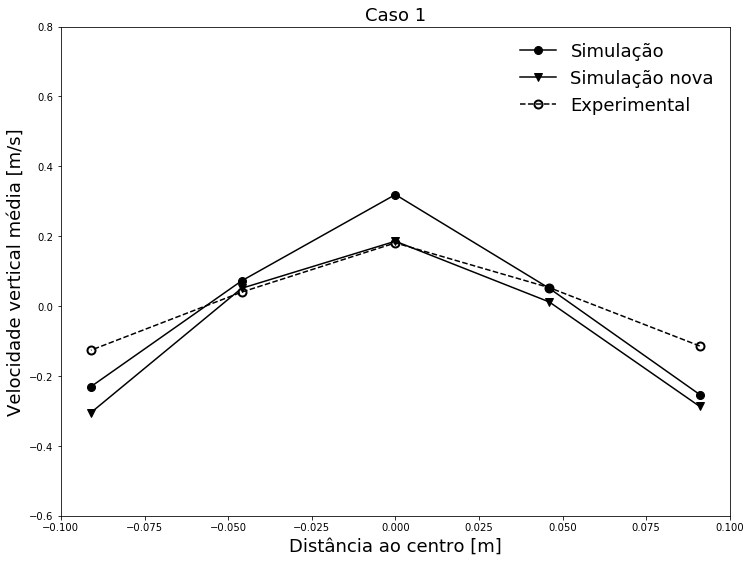

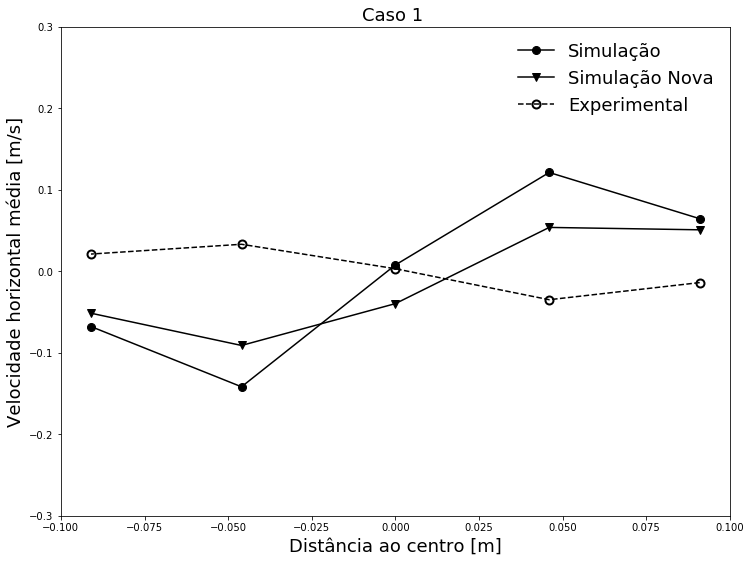

In [6]:
plt.plot(x, caso1_no_dist_v, linestyle = "-", color = "black", marker = 'o', markersize = 8, label = "Simulação")
plt.plot(x, caso1_no_dist_v_alpha11, linestyle = "-", color = "black", marker = 'v', markersize = 8, label = "Simulação nova")
plt.plot(x, caso1_experimental_lv, linestyle = "--", color = "black", marker = 'o', markeredgewidth=2, markerfacecolor="None", markersize = 8, label = "Experimental")
#plt.plot(x, caso1_experimental_lv, linestyle = "--", color = "black", marker = 'v', markersize = 8, label = "Experimental - lagrangean")
plt.title("Caso 1", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade vertical média [m/s]", fontsize = 18)
plt.legend(fontsize = 18, frameon = False)
#plt.xlim(0, 10)     
plt.ylim(-0.6, 0.8) 
plt.savefig("caso1_sem_dist_vertical_velocity.png")
plt.show()

plt.plot(x, (caso1_no_dist_h), linestyle = "-", color = "black", marker = 'o', markersize = 8, label = "Simulação")
plt.plot(x, (caso1_no_dist_h_alpha11), linestyle = "-", color = "black", marker = 'v', markersize = 8, label = "Simulação Nova")
plt.plot(x, caso1_experimental_lh, linestyle = "--", color = "black", marker = 'o', markeredgewidth=2, markerfacecolor="None", markersize = 8, label = "Experimental")
#plt.plot(x, caso1_experimental_lh, linestyle = "--", color = "black", marker = 'v', markersize = 8, label = "Experimental - lagrangean")
plt.title("Caso 1 ", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade horizontal média [m/s]", fontsize = 18)
plt.ylim(-0.3, 0.3) 
plt.legend(fontsize = 18, frameon = False)
plt.savefig("caso1_sem_dist_horizontal_velocity.png")
plt.show()

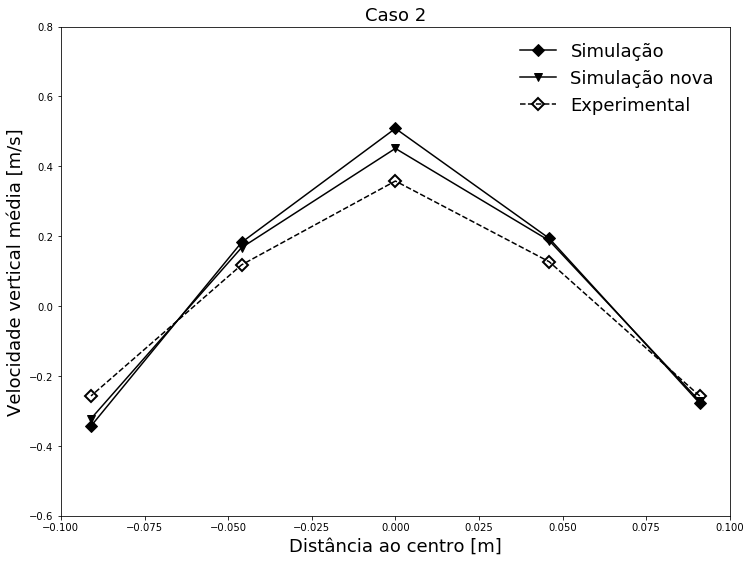

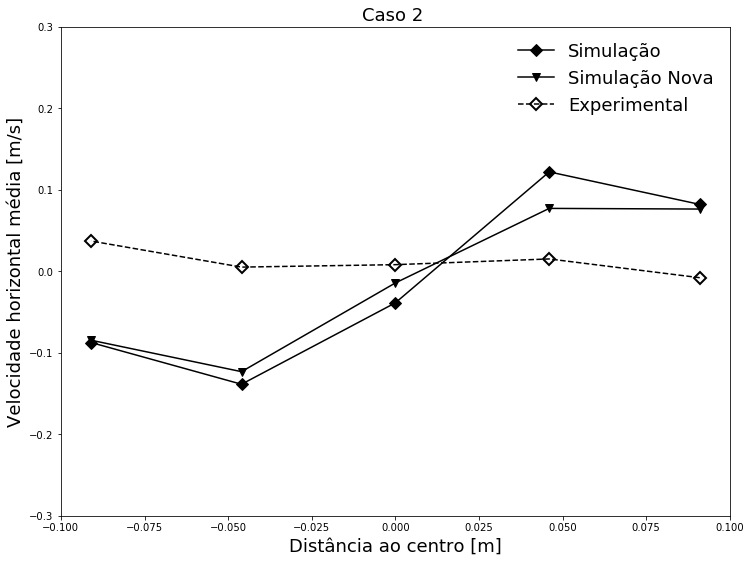

In [7]:
#Case 2

plt.plot(x, caso2_no_dist_v, linestyle = "-", color = "black", marker = 'D', markersize = 8, label = "Simulação")
plt.plot(x, caso2_no_dist_v_alpha11, linestyle = "-", color = "black", marker = 'v', markersize = 8, label = "Simulação nova")
plt.plot(x, caso2_experimental_lv, linestyle = "--", color = "black", marker = 'D', markeredgewidth=2, markerfacecolor="None", markersize = 8, label = "Experimental")
#plt.plot(x, caso1_experimental_lv, linestyle = "--", color = "black", marker = 'v', markersize = 8, label = "Experimental - lagrangean")
plt.title("Caso 2", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade vertical média [m/s]", fontsize = 18)
plt.legend(fontsize = 18, frameon = False)
plt.ylim(-0.6, 0.8) 
plt.savefig("caso2_sem_dist_vertical_velocity.png")
plt.show()

plt.plot(x, (caso2_no_dist_h), linestyle = "-", color = "black", marker = 'D', markersize = 8, label = "Simulação")
plt.plot(x, (caso2_no_dist_h_alpha11), linestyle = "-", color = "black", marker = 'v', markersize = 8, label = "Simulação Nova")
plt.plot(x, caso2_experimental_lh, linestyle = "--", color = "black", marker = 'D', markeredgewidth=2, markerfacecolor="None", markersize = 8, label = "Experimental")
#plt.plot(x, caso1_experimental_lh, linestyle = "--", color = "black", marker = 'v', markersize = 8, label = "Experimental - lagrangean")
plt.title("Caso 2 ", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade horizontal média [m/s]", fontsize = 18)
plt.ylim(-0.3, 0.3) 
plt.legend(fontsize = 18, frameon = False)

plt.savefig("caso2_sem_dist_horizontal_velocity.png")
plt.show()


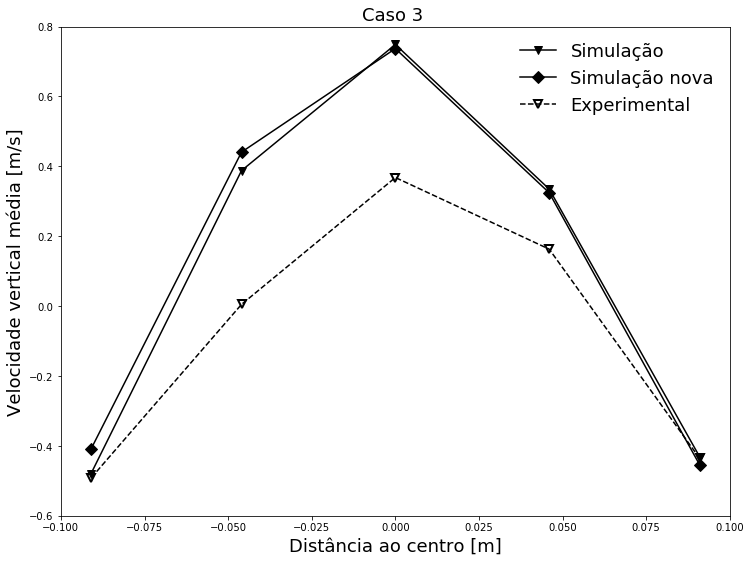

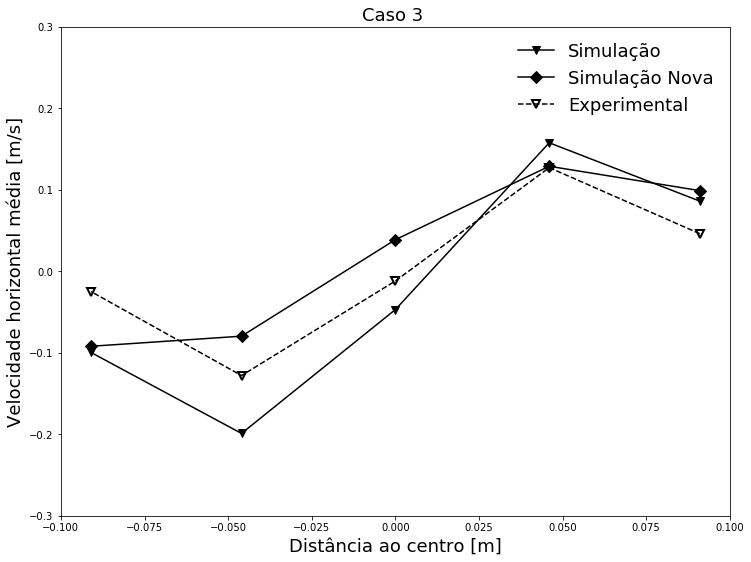

In [8]:
plt.plot(x, caso3_no_dist_v, linestyle = "-", color = "black", marker = 'v', markersize = 8, label = "Simulação")
plt.plot(x, caso3_no_dist_v_alpha11, linestyle = "-", color = "black", marker = 'D', markersize = 8, label = "Simulação nova")
plt.plot(x, caso3_experimental_v, linestyle = "--", color = "black", marker = 'v', markeredgewidth=2, markerfacecolor="None", markersize = 8, label = "Experimental")
plt.title("Caso 3 ", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade vertical média [m/s]", fontsize = 18)
plt.legend(fontsize = 18, frameon = False)
plt.ylim(-0.6, 0.8) 
plt.savefig("caso3_sem_dist_vertical_velocity.png")
plt.show()

plt.plot(x, (caso3_no_dist_h), linestyle = "-", color = "black", marker = 'v', markersize = 8, label = "Simulação")
plt.plot(x, (caso3_no_dist_h_alpha11), linestyle = "-", color = "black", marker = 'D', markersize = 8, label = "Simulação Nova")
plt.plot(x, caso3_experimental_h, linestyle = "--", color = "black", marker = 'v', markeredgewidth=2, markerfacecolor="None", markersize = 8, label = "Experimental")
plt.title("Caso 3 ", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade horizontal média [m/s]", fontsize = 18)
plt.legend(fontsize = 18, frameon = False)
plt.ylim(-0.3, 0.3) 
plt.savefig("caso3_sem_dist_horizontal_velocity.png")
plt.show()

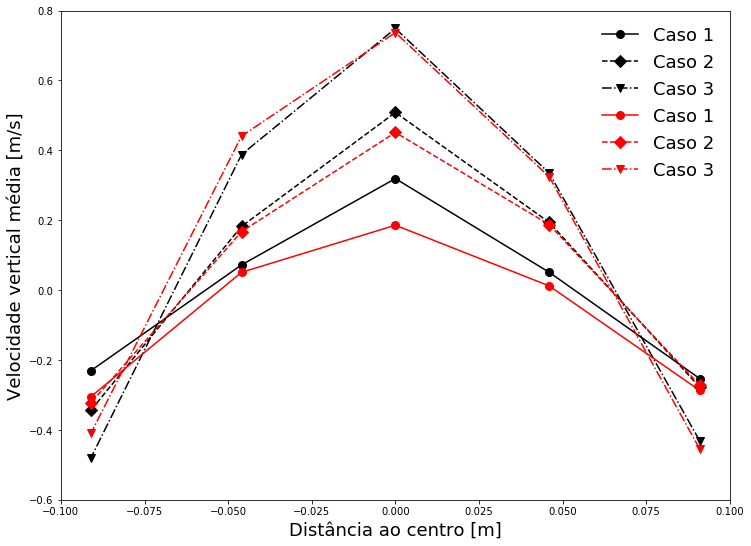

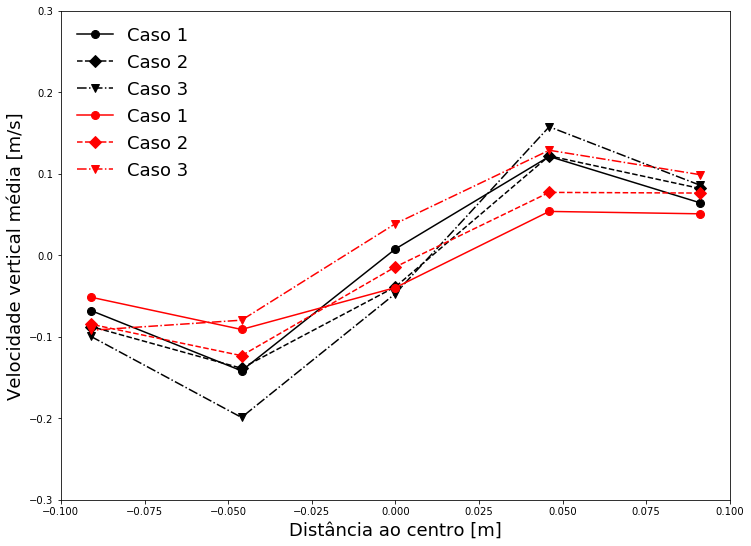

In [9]:

plt.plot(x, caso1_no_dist_v, linestyle = "-", color = "black", marker = 'o', markersize = 8, label = "Caso 1")
plt.plot(x, caso2_no_dist_v, linestyle = "--", color = "black", marker = 'D', markersize = 8, label = "Caso 2")
plt.plot(x, caso3_no_dist_v, linestyle = "-.", color = "black", marker = 'v', markersize = 8, label = "Caso 3")
plt.plot(x, caso1_no_dist_v_alpha11, linestyle = "-", color = "red", marker = 'o', markersize = 8, label = "Caso 1")
plt.plot(x, caso2_no_dist_v_alpha11, linestyle = "--", color = "red", marker = 'D', markersize = 8, label = "Caso 2")
plt.plot(x, caso3_no_dist_v_alpha11, linestyle = "-.", color = "red", marker = 'v', markersize = 8, label = "Caso 3")
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade vertical média [m/s]", fontsize = 18)
plt.legend(fontsize = 18, frameon = False)
plt.ylim(-0.6, 0.8) 
plt.savefig("vertical_velocity.png")
plt.show()

plt.plot(x, caso1_no_dist_h, linestyle = "-", color = "black", marker = 'o', markersize = 8, label = "Caso 1")
plt.plot(x, caso2_no_dist_h, linestyle = "--", color = "black", marker = 'D', markersize = 8, label = "Caso 2")
plt.plot(x, caso3_no_dist_h, linestyle = "-.", color = "black", marker = 'v', markersize = 8, label = "Caso 3")
plt.plot(x, caso1_no_dist_h_alpha11, linestyle = "-", color = "red", marker = 'o', markersize = 8, label = "Caso 1")
plt.plot(x, caso2_no_dist_h_alpha11, linestyle = "--", color = "red", marker = 'D', markersize = 8, label = "Caso 2")
plt.plot(x, caso3_no_dist_h_alpha11, linestyle = "-.", color = "red", marker = 'v', markersize = 8, label = "Caso 3")
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade vertical média [m/s]", fontsize = 18)
plt.legend(fontsize = 18, frameon = False)
plt.ylim(-0.3, 0.3) 
plt.savefig("horizontal_velocity.png")
plt.show()

In [10]:

plt.plot(x, v, linestyle = "-", color = "black", marker = 'o', markersize = 8, label = "Simulação")
plt.plot(x, caso3_experimental_v, linestyle = "--", color = "black", marker = 'D', markersize = 8, label = "Experimental")
plt.title("Caso 3 - com distribuidor ", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade vertical média [m/s]", fontsize = 18)
plt.ylim(-0.6, 0.8) 
plt.legend(fontsize = 18, frameon = False)
plt.show()

plt.plot(x, h, linestyle = "-", color = "black", marker = 'o', markersize = 8, label = "Simulação")
plt.plot(x, caso3_experimental_h, linestyle = "--", color = "black", marker = 'D', markersize = 8, label = "Experimental")
plt.title("Caso 3 - com distribuidor ", fontsize = 18)
plt.xlabel("Distância ao centro [m]", fontsize = 18)
plt.ylabel("Velocidade horizontal média [m/s]", fontsize = 18)
plt.ylim(-0.3, 0.3) 
plt.legend(fontsize = 16, frameon = False)
plt.show()

NameError: name 'v' is not defined